In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.use_SVG = True

from rdkit.Chem import rdmolops

import py3Dmol
from ipywidgets import interact, interactive, fixed

In [3]:
# get the entire pdb structure as an rdkit molecule
mol = Chem.MolFromPDBFile('/Users/curt/Downloads/1yat.pdb')

# split the "molecule" into fragments by covalent connectivity
frags = rdmolops.GetMolFrags(mol, asMols=True)

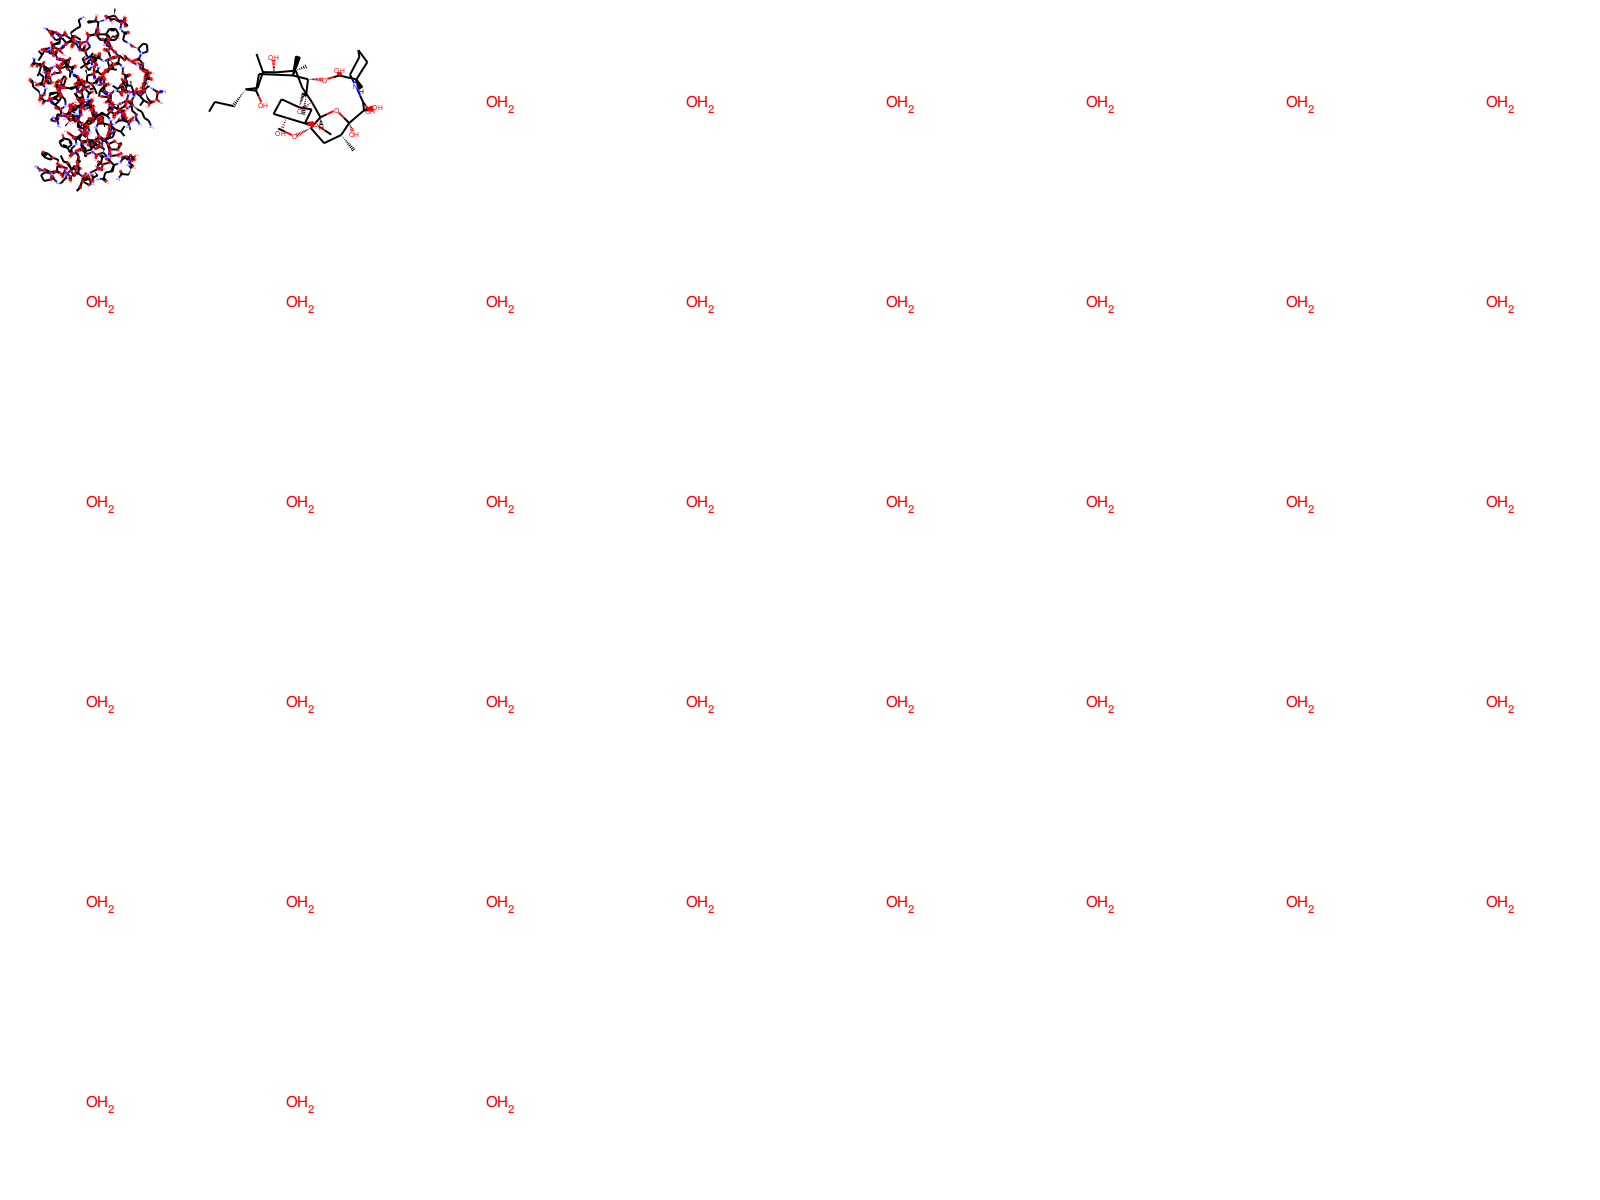

In [4]:
# plot all the fragments to determine which is tacrolimus (most are just water)
Draw.MolsToGridImage(frags, molsPerRow=8)

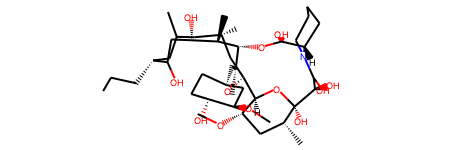

In [5]:
# verify that fragment "1" (in python, the 2nd fragment) is tacrolimus
frags[1]

In [6]:
# get a rotatable 3D view of the conformation from the PDB file
tacro_block = Chem.MolToMolBlock(frags[1])

p = py3Dmol.view(width=400, height=400)
p.removeAllModels()
p.addModel(tacro_block, 'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()